In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [2]:
types= {
    "event": "category", 
    "model": "category", 
    "condition": "category", 
    "color": "category", 
    "storage": "category"
}

df_events = pd.read_csv("events.csv", low_memory=False)

In [3]:
users = df_events[["new_vs_returning","city","region","country","event","timestamp"]]
users = users.loc[users["new_vs_returning"].isnull() == False]
users.count()

new_vs_returning    87378
city                87378
region              87378
country             87378
event               87378
timestamp           87378
dtype: int64

In [4]:
#users = users.loc[users["new_vs_returning"] == "New"]
user = users["new_vs_returning"].value_counts()
user


Returning    60480
New          26898
Name: new_vs_returning, dtype: int64

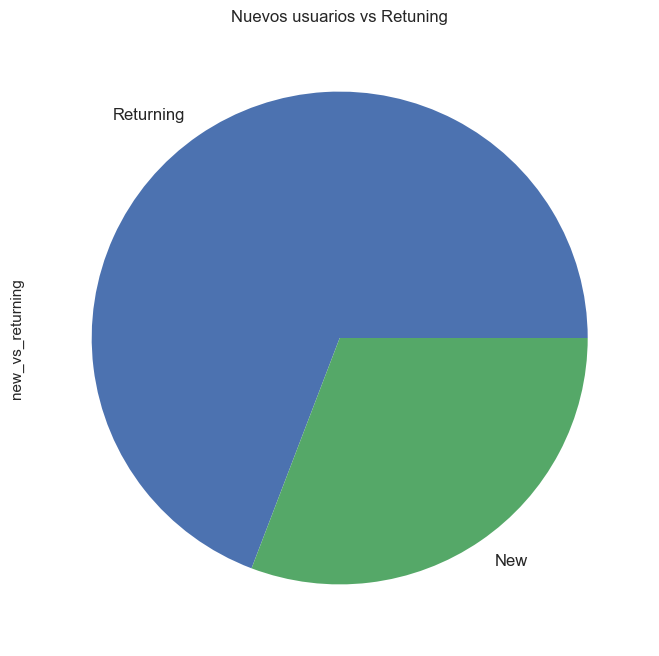

In [5]:
ax = user.plot(kind = 'pie', title = "Nuevos usuarios vs Retuning",figsize =(8,8),legend = False, fontsize = 12 )
#ax.set_xlabel("Almacenamiento interno", fontsize = 18)
#ax.set_ylabel("Cantidad de compras",fontsize = 18)
plt.show()

In [6]:
users = users.loc[users["country"] != "Unknown"]
usersN = users.loc[users["new_vs_returning"] == "New"]
usersN = usersN["country"].value_counts().head(4)
usersR = users.loc[users["new_vs_returning"] == "Returning"]
usersR = usersR["country"].value_counts().head(4)
usersR

Brazil           58541
United States      168
Argentina           70
Canada              25
Name: country, dtype: int64

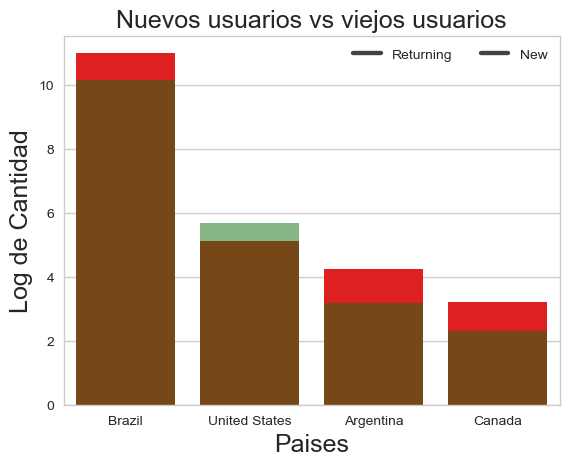

In [7]:
usersN = np.log(usersN)
usersR = np.log(usersR)
g = sns.barplot(x = usersR.index, y = usersR.values, orient='v', palette=['red'], alpha=1)
g = sns.barplot(x = usersN.index, y = usersN.values, orient='v', palette=['green'], alpha=0.5)
g.legend(['Returning','New'],ncol=2, loc='upper right');
g.set_title("Nuevos usuarios vs viejos usuarios", fontsize=18)
g.set_xlabel("Paises",fontsize=18)
g.set_ylabel("Log de Cantidad", fontsize=18)

plt.show()

#sns.countplot(x = usersN.index, y = usersN.values)
#sns.countplot(usersR)

#ax = userN.plot(kind = 'barh', title = "Nuevos usuarios por Paises",figsize =(15,10),legend = False, fontsize = 12 )
#ax.subplt(userR ,color ="r")
#ax.set_xlabel("Paises", fontsize = 18)
#ax.set_ylabel("Cantidad nuevos de usuarios",fontsize = 18)

In [8]:
#users = np.log(user)
#ax = user.plot(kind = 'barh', title = "Nuevos usuarios por Paises",figsize =(15,10),legend = False, fontsize = 12 )
#ax.set_xlabel("Paises", fontsize = 18)
#ax.set_ylabel("Log cantidad nuevos de usuarios",fontsize = 18)

In [9]:
usersB = users.loc[users["country"] == "Brazil"]
usersB = usersB.loc[users["region"] != "Unknown"]
userB = usersB["region"].value_counts().head(10)
userB

Sao Paulo            24996
Minas Gerais          7755
Rio de Janeiro        6913
Bahia                 5737
Pernambuco            2962
Ceara                 2829
Parana                2602
Rio Grande do Sul     2576
Federal District      1739
Goias                 1564
Name: region, dtype: int64

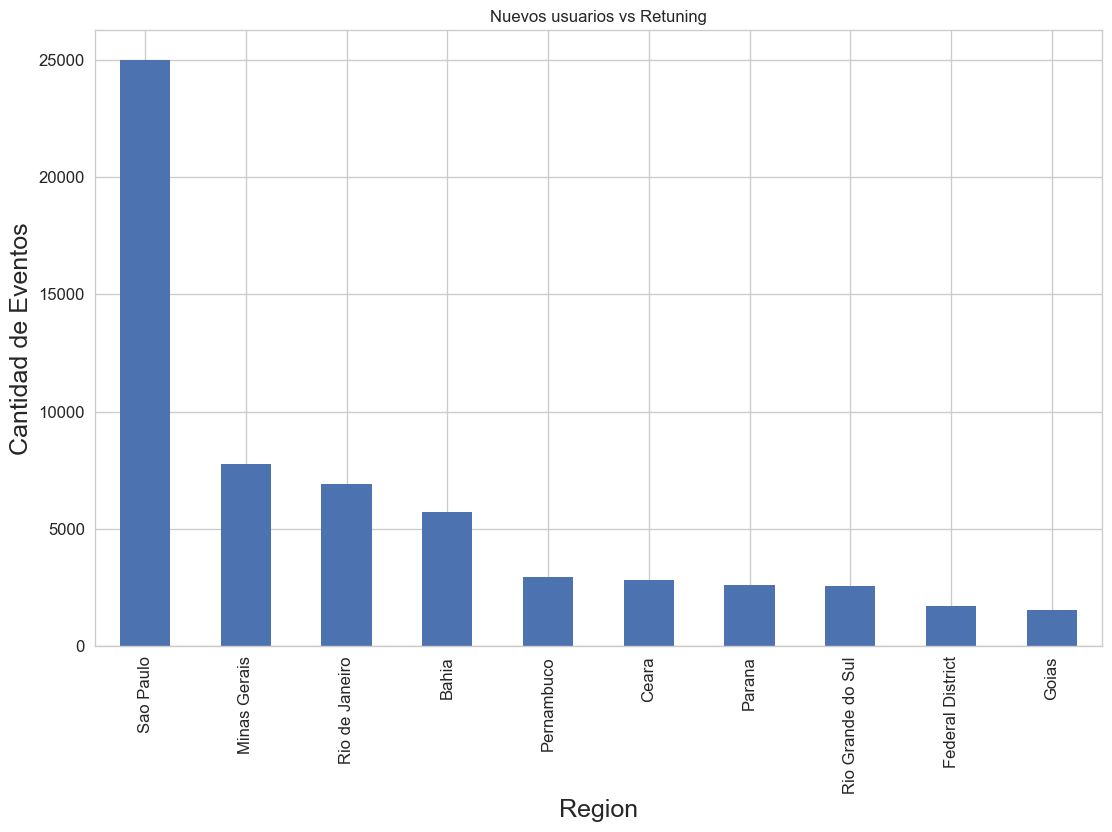

In [10]:
ax = userB.plot(kind = 'bar', title = "Nuevos usuarios vs Retuning",figsize =(13,8),legend = False, fontsize = 12 )
ax.set_xlabel("Region", fontsize = 18)
ax.set_ylabel("Cantidad de Eventos",fontsize = 18)
plt.show()

In [11]:
users = users.loc[users["country"] == "Argentina"]
users = users.loc[users["region"] != "Unknown"]
usersA = users["region"].value_counts().head(10)
usersA
plt.show()

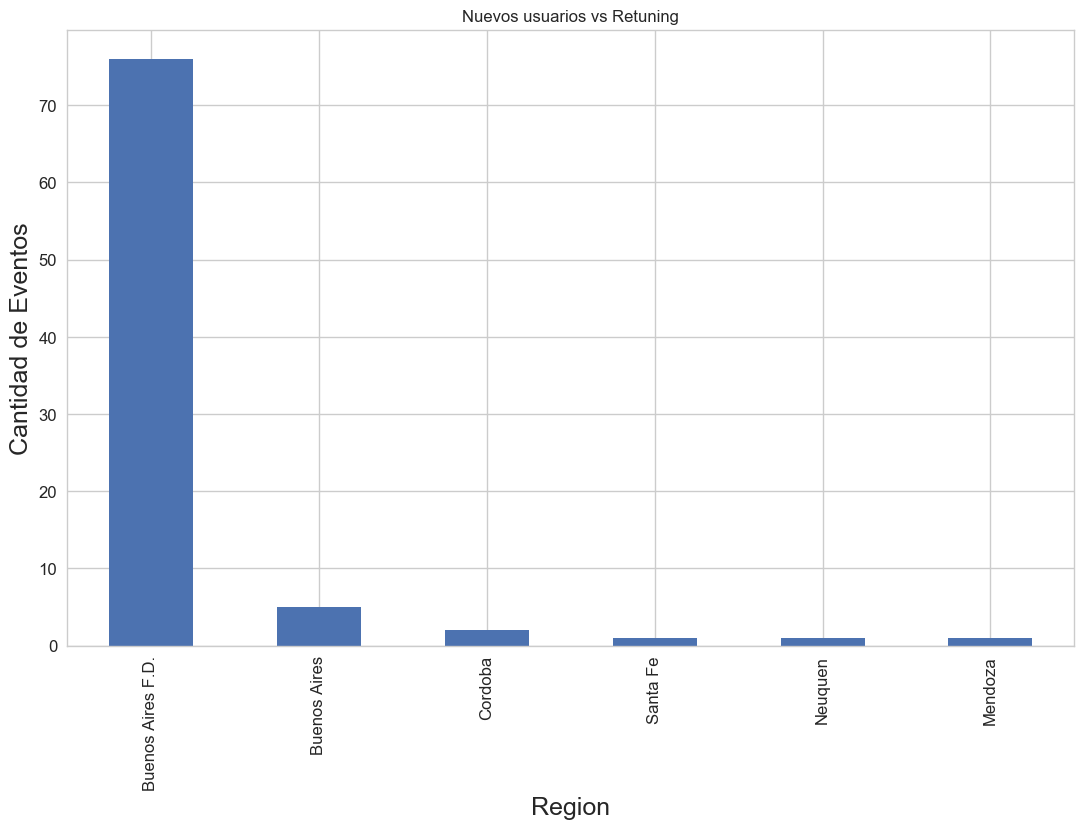

In [12]:
ax = usersA.plot(kind = 'bar', title = "Nuevos usuarios vs Retuning",figsize =(13,8),legend = False, fontsize = 12 )
ax.set_xlabel("Region", fontsize = 18)
ax.set_ylabel("Cantidad de Eventos",fontsize = 18)
plt.show()